# Artifical Neural  Network

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
datas=pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
dataset.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
dataset=dataset.fillna(method="bfill")

C:\Users\divya\AppData\Local\Temp\ipykernel_30880\203041930.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset=dataset.fillna(method="bfill")


In [6]:
dataset.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
datas.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
le.fit(dataset["Gender"])
dataset["Gender"]=le.transform(dataset["Gender"])

In [14]:
le=LabelEncoder()
le.fit(datas["Gender"])
datas["Gender"]=le.transform(datas["Gender"])

In [15]:
li=LabelEncoder()
li.fit(dataset["Subscription Type"])
dataset["Subscription Type"]=li.transform(dataset["Subscription Type"])

In [19]:
li=LabelEncoder()
li.fit(datas["Subscription Type"])
datas["Subscription Type"]=li.transform(datas["Subscription Type"])

In [20]:
li=LabelEncoder()
li.fit(dataset["Contract Length"])
dataset["Contract Length"]=li.transform(dataset["Contract Length"])

In [21]:
li=LabelEncoder()
li.fit(datas["Contract Length"])
datas["Contract Length"]=li.transform(datas["Contract Length"])

In [22]:
input_data=dataset.iloc[:,:-1]
output_data=dataset.iloc[:,-1]


In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)


In [24]:
x_train=input_data
y_train=output_data

In [25]:
x_test=datas.iloc[:,:-1]
y_test=datas.iloc[:,-1]

In [26]:
x_train.shape

(440833, 11)

In [28]:
import tensorflow
from keras.layers import Dense
from keras.models import Sequential
ann=Sequential()


In [31]:
ann.add(Dense(64,input_dim=11,activation="relu"))
ann.add(Dense(32,activation="relu"))
ann.add(Dense(16,activation="relu"))
ann.add(Dense(8,activation="relu"))
ann.add(Dense(1, activation="sigmoid"))


C:\Users\divya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [37]:
import numpy as np
print(np.unique(y_train))


[0. 1.]


In [39]:
ann.fit(x_train,y_train,batch_size=64,epochs=50)

Epoch 1/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9814 - loss: 0.0565
Epoch 2/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9957 - loss: 0.0109
Epoch 3/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9967 - loss: 0.0079
Epoch 4/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9971 - loss: 0.0069
Epoch 5/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.9973 - loss: 0.0063
Epoch 6/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9977 - loss: 0.0056
Epoch 7/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.9980 - loss: 0.0049
Epoch 8/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9980 - loss: 0.0050
Epoch 9/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9981 - loss: 0.0046
Epoch 10/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9983 - loss: 0.0040
Epoch 11/50
6889/6889 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.9983 - loss: 0.0041
Epoch 12/50
6889/68

In [50]:
prd=ann.predict(x_test)

2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [52]:
prd

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [56]:
prd_data=[]
for i in prd :
 if i[0]>0.5:
     prd_data.append(1)
 else:
     prd_data.append(0)

In [64]:
prd1=ann.predict(x_train)

13777/13777 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step


In [65]:
prd_data1=[]
for i in prd1 :
 if i[0]>0.5:
     prd_data1.append(1)
 else:
     prd_data1.append(0)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prd_data) 


0.5258023425606612

In [70]:
accuracy_score(y_train,prd_data1) 

0.9995712662164584

In [72]:
ann.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9997 - loss: 8.7540e-04 - val_accuracy: 0.5258 - val_loss: 1887866.8750
Epoch 2/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9997 - loss: 7.1094e-04 - val_accuracy: 0.5258 - val_loss: 2417090.7500
Epoch 3/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.5258 - val_loss: 2449468.5000
Epoch 4/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9997 - loss: 8.4967e-04 - val_accuracy: 0.5258 - val_loss: 2709315.0000
Epoch 5/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9998 - loss: 7.9669e-04 - val_accuracy: 0.5258 - val_loss: 1957854.3750
Epoch 6/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.9998 - loss: 7.0067e-04 - val_accuracy: 0.5257 - val_loss: 1524977.2500
Epoch 7/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9997 - loss: 6.9893e-04 - val_accuracy: 0.5258 - val_loss: 1891371.1250
Epoch 8/50
4409/4

In [73]:
ann.history.history 

{'accuracy': [0.9997074007987976,
  0.9997028112411499,
  0.9997232556343079,
  0.9997005462646484,
  0.999714195728302,
  0.9997119307518005,
  0.9997323155403137,
  0.999698281288147,
  0.9997799396514893,
  0.9997482299804688,
  0.9997096657752991,
  0.9997731447219849,
  0.9997209906578064,
  0.9997754096984863,
  0.9997300505638123,
  0.9997867941856384,
  0.9997345805168152,
  0.9997844696044922,
  0.9997482299804688,
  0.9997799396514893,
  0.9997799396514893,
  0.9997708797454834,
  0.9997754096984863,
  0.9997618198394775,
  0.9997822046279907,
  0.9998185038566589,
  0.9998049139976501,
  0.9998185038566589,
  0.9997890591621399,
  0.9997731447219849,
  0.9998230338096619,
  0.9997867941856384,
  0.9997981190681458,
  0.9998253583908081,
  0.9998230338096619,
  0.9998185038566589,
  0.9998321533203125,
  0.9998230338096619,
  0.9997890591621399,
  0.9998094439506531,
  0.9997776746749878,
  0.999829888343811,
  0.9998162388801575,
  0.9998253583908081,
  0.9998593330383301,
 

In [77]:
train_accuracy=ann.history.history["accuracy"]
test_accuracy=ann.history.history["val_accuracy"]

In [79]:
len(test_accuracy)

50

In [91]:
import matplotlib.pyplot as plt

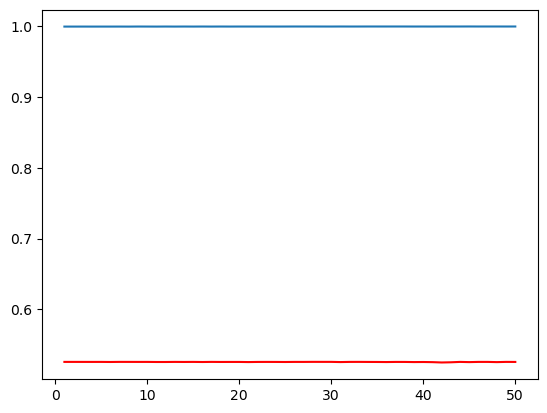

In [93]:
plt.plot([i for i in range (1,51)],train_accuracy)
plt.plot([i for i in range(1,51)],test_accuracy,c="red")
plt.show()

# Early stopping ,dropout layer , Batch Normalization and Regularization

In [135]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout,BatchNormalization
from keras.regularizers import L2

In [147]:
ann.add(Dense(64,input_dim=11,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dropout(0.8))
ann.add(BatchNormalization())

ann.add(Dense(32,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dropout(0.8))
ann.add(BatchNormalization())

ann.add(Dense(16,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dropout(0.8))
ann.add(BatchNormalization())

ann.add(Dense(8,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dropout(0.8))
ann.add(BatchNormalization())

ann.add(Dense(1, activation="sigmoid"))


C:\Users\divya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [163]:
EarlyStopping(patience=5, restore_best_weights=True)


In [167]:
ann.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test),callbacks=EarlyStopping(patience=10, restore_best_weights=True))

Epoch 1/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 76s 17ms/step - accuracy: 0.5681 - loss: 0.6839 - val_accuracy: 0.4737 - val_loss: 0.7098
Epoch 2/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 79s 18ms/step - accuracy: 0.5670 - loss: 0.6841 - val_accuracy: 0.4737 - val_loss: 0.7083
Epoch 3/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 76s 17ms/step - accuracy: 0.5681 - loss: 0.6839 - val_accuracy: 0.4737 - val_loss: 0.7091
Epoch 4/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 78s 18ms/step - accuracy: 0.5679 - loss: 0.6839 - val_accuracy: 0.4737 - val_loss: 0.7099
Epoch 5/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 75s 17ms/step - accuracy: 0.5671 - loss: 0.6841 - val_accuracy: 0.4737 - val_loss: 0.7093
Epoch 6/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 75s 17ms/step - accuracy: 0.5665 - loss: 0.6843 - val_accuracy: 0.4737 - val_loss: 0.7104
Epoch 7/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 77s 17ms/step - accuracy: 0.5659 - loss: 0.6844 - val_accuracy: 0.4737 - val_loss: 0.7116
Epoch 8/50
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 77s 17ms/step - accuracy: 0.5684 -

In [169]:
ann.history.history

{'accuracy': [0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875,
  0.567108154296875],
 'loss': [0.6841262578964233,
  0.6841221451759338,
  0.6841299533843994,
  0.6841307878494263,
  0.6841303110122681,
  0.6841298341751099,
  0.6841207146644592,
  0.6841245889663696,
  0.6841320991516113,
  0.6841332316398621,
  0.6841193437576294,
  0.6841219663619995],
 'val_accuracy': [0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324,
  0.47368502616882324],
 'val_loss': [0.7097516059875488,
  0.7083328366279602,
  0.709138810634613,
  0.7098570466041565,
  0.7093177437782288,
  0.7104286551475525,
  0.7115604281425476,
  0.